<a href="https://colab.research.google.com/github/yiheng870106/Mathematics-of-Data-Science-Project-2-yiheng/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


Inertia =  924.3159961688092


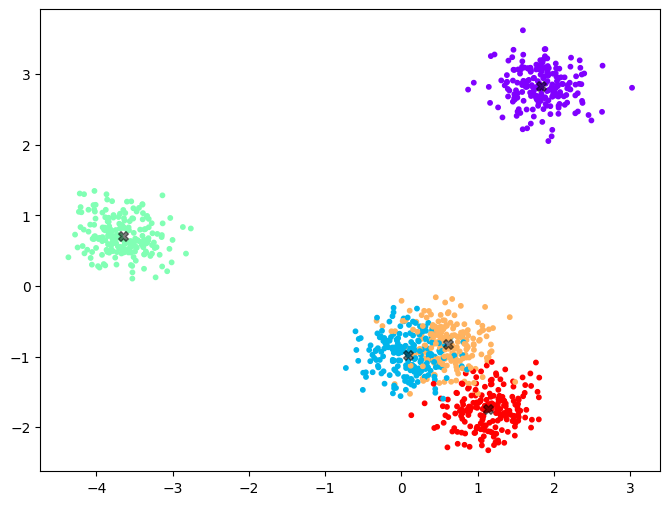

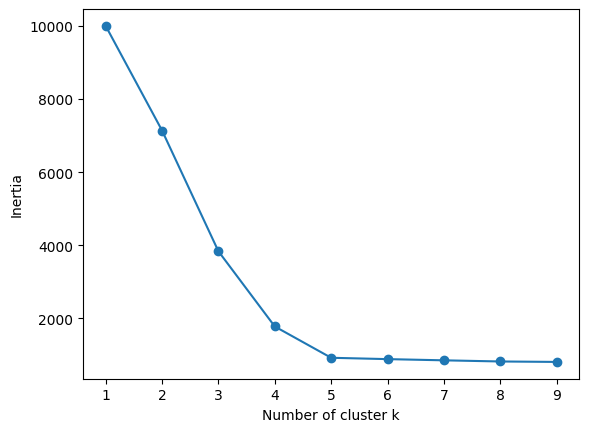

In [6]:
import matplotlib.pyplot as plt

# perform a k-means cluster analysis with k = 5.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1).fit(X)
y_kmeans = kmeans.labels_

# Report your smallest k-means inertia value.
print("Inertia = ",kmeans.inertia_)

# Make a 2D visualization of your clusters via PCA, including both the clusters (colored by cluster) and the cluster centers.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
center_pca = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_kmeans, s=10, cmap="rainbow")
plt.scatter(center_pca[:,0],center_pca[:,1],c="black",marker="X",s=50,alpha=0.5)
#plt.title("KMeans Clusters (PCA 2D Projection)")
#plt.xlabel("PC1")
#plt.ylabel("PC2")
plt.show()

# make a confusion matrix that compares your assigned labels to the “true” labels. Here, you’ll have to figure out how to best match the predicted and true labels.
# perform an “elbow analysis” to justify the use of k = 5.
inertias = []
K =range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertias.append(kmeans.inertia_)
#idx = np.argmin(inertias)
#print("Best k = ",K[idx])
#print("Smallest inertia =", inertias[idx])
plt.plot(K, inertias, marker="o")
plt.xlabel('Number of cluster k')
plt.ylabel('Inertia')
#3plt.title('Elbow Analysis')
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [ ]:
# your code here

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here